<a href="https://colab.research.google.com/github/mondragonsi/Colab-DataAnalysis-Politics/blob/main/gastadores_dez_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import zipfile
import plotly.express as px


url = 'https://www.camara.leg.br/cotas/Ano-2023.csv.zip'



# read the dataset using the compression zip
politics_df = pd.read_csv(url,compression='zip',encoding='UTF-8',sep=';')



In [27]:
politics_df.head

<bound method NDFrame.head of        txNomeParlamentar  cpf  ideCadastro  nuCarteiraParlamentar  \
0             LID.GOV-CD  NaN          NaN                    NaN   
1             LID.GOV-CD  NaN          NaN                    NaN   
2             LID.GOV-CD  NaN          NaN                    NaN   
3             LID.GOV-CD  NaN          NaN                    NaN   
4             LID.GOV-CD  NaN          NaN                    NaN   
...                  ...  ...          ...                    ...   
168063    Dr Fabio Rueda  NaN     227401.0                  569.0   
168064    Dr Fabio Rueda  NaN     227401.0                  569.0   
168065    Dr Fabio Rueda  NaN     227401.0                  569.0   
168066    Dr Fabio Rueda  NaN     227401.0                  569.0   
168067    Douglas Viegas  NaN     227433.0                  571.0   

        nuLegislatura sgUF sgPartido  codLegislatura  numSubCota  \
0                2023  NaN       NaN              57           1   
1    

In [28]:
politics_df.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'datPagamentoRestituicao', 'vlrRestituicao',
       'nuDeputadoId', 'ideDocumento', 'urlDocumento'],
      dtype='object')

In [29]:
pol_df = politics_df[['txNomeParlamentar','sgUF','sgPartido','txtDescricao','txtDescricaoEspecificacao','txtFornecedor','datEmissao','vlrDocumento','vlrLiquido','numMes','numAno','vlrRestituicao','urlDocumento']].copy()

In [30]:
pol_df

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtDescricaoEspecificacao,txtFornecedor,datEmissao,vlrDocumento,vlrLiquido,numMes,numAno,vlrRestituicao,urlDocumento
0,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2023-02-07T00:00:00,899.00,899.00,2,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
1,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2023-06-06T00:00:00,899.00,899.00,6,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
2,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2023-07-12T00:00:00,899.00,899.00,7,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
3,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2023-08-03T00:00:00,899.00,899.00,8,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
4,LID.GOV-CD,NaN,NaN,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,AMORETTO CAFES EXPRESSO LTDA,2023-09-12T00:00:00,899.00,899.00,9,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168063,Dr Fabio Rueda,AC,UNIÃO,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO 303 NORTE LTDA,2023-12-19T00:00:00,100.00,100.00,12,2023,NaN,https://www.camara.leg.br/cota-parlamentar/not...
168064,Dr Fabio Rueda,AC,UNIÃO,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO CAMILA LTDA - FILIAL,2023-12-19T00:00:00,375.13,375.13,12,2023,NaN,https://www.camara.leg.br/cota-parlamentar/not...
168065,Dr Fabio Rueda,AC,UNIÃO,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,AUTO POSTO SANTO ANTONIO LTDA,2023-12-20T00:00:00,265.03,265.03,12,2023,NaN,https://www.camara.leg.br/cota-parlamentar/not...
168066,Dr Fabio Rueda,AC,UNIÃO,TELEFONIA,NaN,RAMAL,NaN,1.44,1.44,12,2023,NaN,NaN


In [31]:
pol_df.describe()

,vlrDocumento,vlrLiquido,numMes,numAno,vlrRestituicao
count,168068.000000,168068.000000,168068.000000,168068.0,0.0
mean,1125.642268,1118.205678,6.654551,2023.0,NaN
std,3349.046614,3328.535540,3.193356,0.0,NaN
min,-3901.100000,-3901.100000,1.000000,2023.0,NaN
25%,83.580000,83.370000,4.000000,2023.0,NaN
50%,200.000000,200.000000,7.000000,2023.0,NaN
75%,403.990000,400.000000,9.000000,2023.0,NaN
max,178433.000000,161800.000000,12.000000,2023.0,NaN


In [32]:
pol_df.sort_values(by='vlrLiquido',ascending=False)

,txNomeParlamentar,sgUF,sgPartido,txtDescricao,txtDescricaoEspecificacao,txtFornecedor,datEmissao,vlrDocumento,vlrLiquido,numMes,numAno,vlrRestituicao,urlDocumento
115470,Alexandre Guimarães,TO,REPUBLICANOS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,GRÁFICA E EDITORA WR-EIRELI-ME,2023-12-14T00:00:00,178433.00,161800.00,12,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
159112,Dal Barreto,BA,UNIÃO,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,ELMARA ROCHA DOS SANTOS NUNES LTDA,2023-10-24T00:00:00,140000.00,140000.00,10,2023,NaN,https://www.camara.leg.br/cota-parlamentar/not...
59223,Aluisio Mendes,MA,REPUBLICANOS,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,Adriano L Silva Engenharia Serviços e Comércio,2023-11-06T00:00:00,130000.00,130000.00,11,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
3821,Alberto Fraga,DF,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,TOTALGRAF GRAFICA E EDITORA LTDA,2023-08-22T00:00:00,124000.00,124000.00,8,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
45925,Pr. Marco Feliciano,SP,PL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,STUDIO AB - CRIATIVIDADE VISUAL EIRELI - EPP,2023-08-29T00:00:00,122500.00,122500.00,8,2023,NaN,https://www.camara.leg.br/cota-parlamentar/doc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12631,Júlio Cesar,PI,PSD,PASSAGEM AÉREA - RPA,NaN,Cia Aérea - GOL,2023-01-05T00:00:00,-1812.26,-1812.26,1,2023,NaN,NaN
15995,Claudio Cajado,BA,PP,PASSAGEM AÉREA - RPA,NaN,Cia Aérea - GOL,2023-05-18T00:00:00,-1898.82,-1898.82,5,2023,NaN,NaN
57626,Paulo Azi,BA,UNIÃO,PASSAGEM AÉREA - RPA,NaN,Cia Aérea - GOL,2023-03-23T00:00:00,-2828.55,-2828.55,3,2023,NaN,NaN
59643,Misael Varella,MG,PSD,PASSAGEM AÉREA - RPA,NaN,Cia Aérea - GOL,2023-09-11T00:00:00,-3144.56,-3144.56,9,2023,NaN,NaN


#O Deputado Alexandre Guimarães	 gastou quase 165 mil reais abruptamente em Dezembro de 2023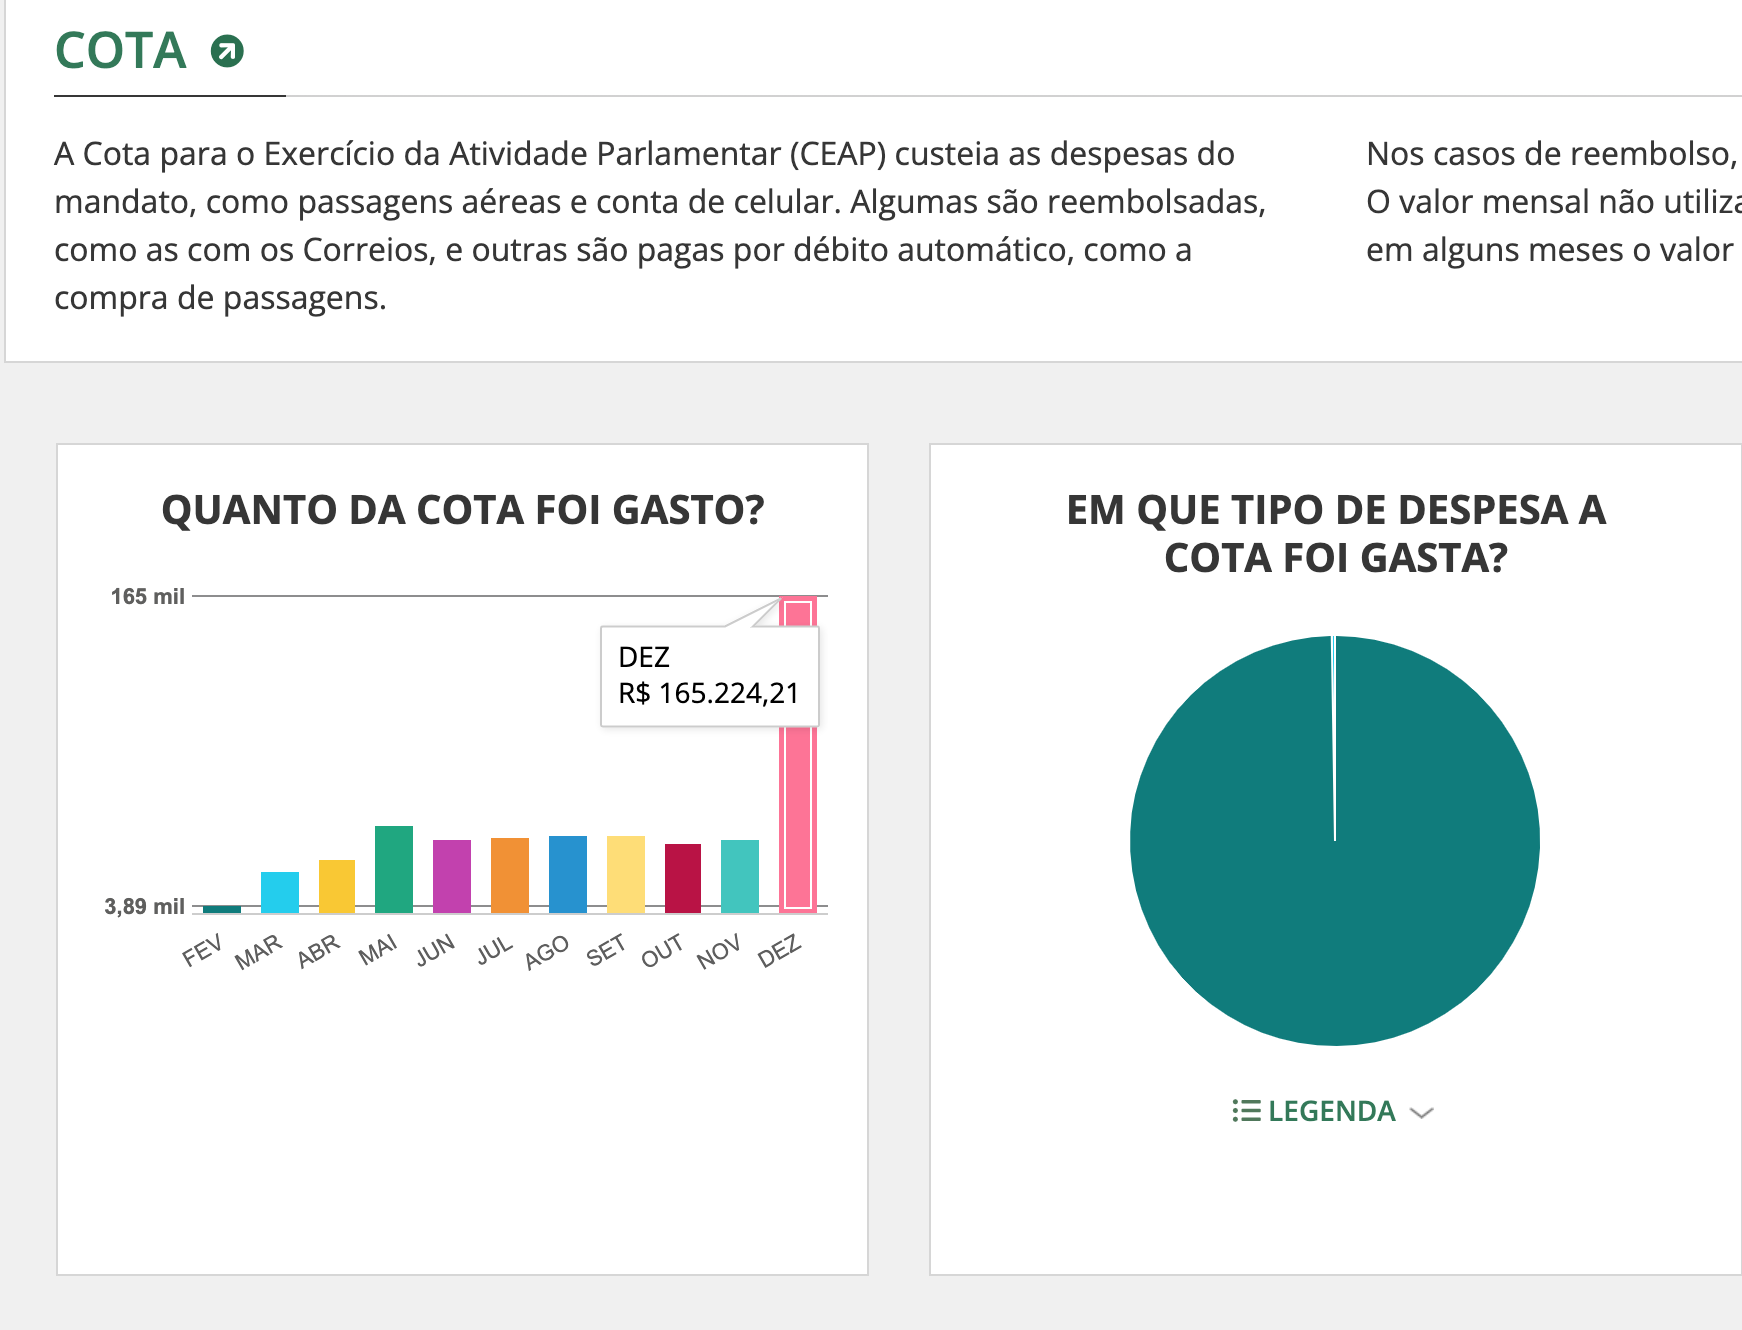

## Nota fiscal : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.camara.leg.br/cota-parlamentar/documentos/publ/3584/2023/7662547.pdf


Noticias relacionadas aos socios da grafica: https://g1.globo.com/to/tocantins/noticia/2020/01/14/dono-de-graficas-acusado-de-desvio-de-dinheiro-ganha-liberdade-apos-mais-de-dois-meses-preso.ghtml

In [33]:
#create a plotly chart grapth showing the top 10 spenders using the colum vlrLiquido

top_5_df = pol_df.sort_values(by='vlrLiquido',ascending=False).head(5)

top_5_df = top_5_df.rename(columns={'txNomeParlamentar':'Politico','vlrLiquido':'Valor', 'sgPartido':'Partido'})

#plot a bar chart using the top_5_df dataframe. Put the Partido value in the bar

fig = px.bar(top_5_df, x='Politico', y='Valor', color='Politico', text='Partido' ,title='Top 5 Deputados gastadores Dez/2023', labels={'sgPartido':'Partido'})

fig.show()